In [351]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup
# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data
from fooof.utils.params import compute_knee_frequency
from pathlib import Path
import glob
from math import floor
from scipy import stats
import math

# GET THE PARAMETERS FOR N2 Transitions

In [393]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/NREM/No_Knee'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

#start a FOOOF object
fm1 = FOOOFGroup()

#create empty vector to store values
S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

# actual loading of parameters
i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    #K_K[i,0:len(fm1.get_params('aperiodic_params','knee'))] = fm1.get_params('aperiodic_params','knee')
    #O_K[i,0:len(fm1.n_peaks_)] = fm1.get_params('aperiodic_params','exponent')
    i = i +1
    
# PLOTTING    
S_K_O = np.nanmean(S_K[::2],axis=0)
S_K_E = np.nanmean(S_K[1::2],axis=0)

S_K_Os = stats.sem(S_K[::2],0, nan_policy = 'omit')
S_K_Es = stats.sem(S_K[1::2],0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), S_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2),S_K_O[0:30]-S_K_Os[0:30], S_K_O[0:30]+S_K_Os[0:30],facecolor='b', alpha=0.25)

plt.plot(np.arange(-30,30,2),S_K_E[0:30],color='r',linestyle='-',linewidth=3, label = 'N2_N3')
plt.fill_between(np.arange(-30,30,2), S_K_E[0:30]-S_K_Es[0:30], S_K_E[0:30]+S_K_Es[0:30],facecolor='red', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('No Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

#plt.savefig("Group_N2_trans_NK.svg", dpi = 600 )    

Text(0.5, 0, 'time relative to transition (s)')

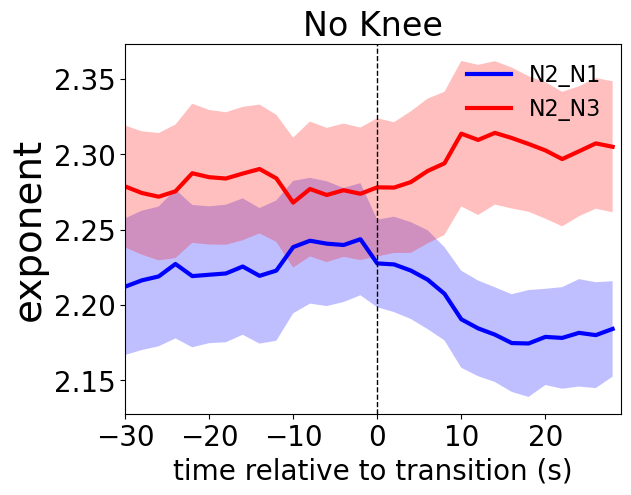

## R SQUARED

Text(0.5, 0, 'time relative to transition (s)')

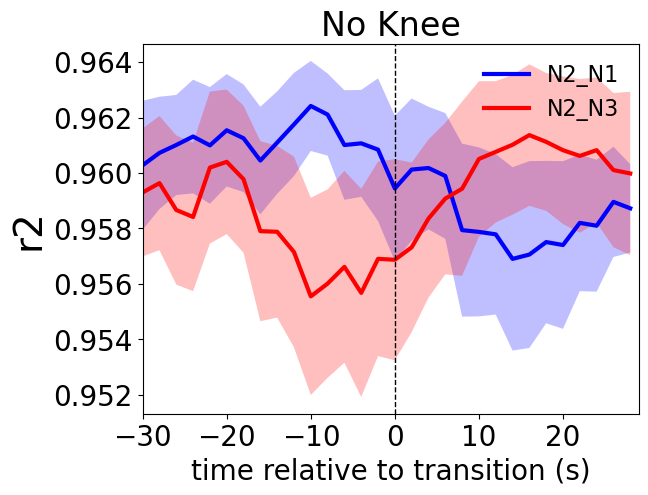

In [339]:
R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)

R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), R_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2),R_K_O[0:30]-R_K_Os[0:30], R_K_O[0:30]+R_K_Os[0:30],facecolor='b', alpha=0.25)

plt.plot(np.arange(-30,30,2),R_K_E[0:30],color='r',linestyle='-',linewidth=3, label = 'N2_N3')
plt.fill_between(np.arange(-30,30,2), R_K_E[0:30]-R_K_Es[0:30], R_K_E[0:30]+R_K_Es[0:30],facecolor='red', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('No Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('r2', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

#plt.savefig("Group_N2_trans_NK.svg", dpi = 600 )

# KNEE MODEL

In [356]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/NREM/KNEE_K'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

#start a FOOOF object
fm1 = FOOOFGroup()

S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    Y2 = fm1.get_params('aperiodic_params','knee')[0:X*40]
    Z2 = np.reshape(Y2, (int(len(Y2)/40) , 40))  
    
    Y3 = fm1.get_params('aperiodic_params','offset')[0:X*40]
    Z3 = np.reshape(Y3, (int(len(Y3)/40) , 40)) 
 
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    K_K[i,0:40] = np.nanmean(Z2,axis= 0)
    O_K[i,0:40] = np.nanmean(Z3,axis= 0)
    i = i +1
    
S_K_O = np.nanmean(S_K[::2],axis=0)
S_K_E = np.nanmean(S_K[1::2],axis=0)
S_K_Os = stats.sem(S_K[::2],0, nan_policy = 'omit')
S_K_Es = stats.sem(S_K[1::2],0, nan_policy = 'omit')

R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)
R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')   

O_K_O = np.nanmean(O_K[::2],axis=0)
O_K_E = np.nanmean(O_K[1::2],axis=0)
O_K_Os = stats.sem(O_K[::2],0, nan_policy = 'omit')
O_K_Es = stats.sem(O_K[1::2],0, nan_policy = 'omit')   

Text(0.5, 0, 'time relative to transition (s)')

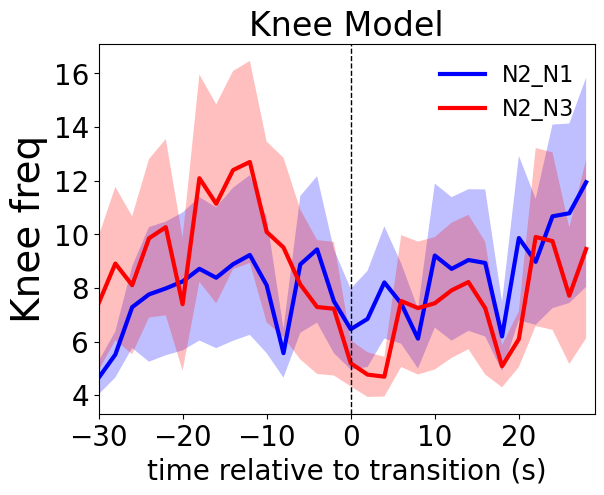

In [371]:
K_K2 = compute_knee_frequency(K_K, S_K)

K_K3 = np.ones([34,40])* np.nan
for i in range(0,K_K2.shape[0]):
    for ii in range(0,K_K2.shape[1]):
        knee = K_K2[i,ii]
        if knee < 1:
            K_K3[i,ii]= 1
        elif knee > 45:
            K_K3[i,ii]= 45
        else:
            K_K3[i,ii]=knee

K_K_O = np.nanmean(K_K3[::2],axis=0)
K_K_E = np.nanmean(K_K3[1::2],axis=0)
K_K_Os = stats.sem(K_K3[::2],0, nan_policy = 'omit')
K_K_Es = stats.sem(K_K3[1::2],0, nan_policy = 'omit')  

plt.plot(np.arange(-30,30,2), K_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2),K_K_O[0:30]-K_K_Os[0:30], K_K_O[0:30]+K_K_Os[0:30],facecolor='b', alpha=0.25)

plt.plot(np.arange(-30,30,2),K_K_E[0:30],color='r',linestyle='-',linewidth=3, label = 'N2_N3')
plt.fill_between(np.arange(-30,30,2), K_K_E[0:30]-K_K_Es[0:30], K_K_E[0:30]+K_K_Es[0:30],facecolor='red', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee Model', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Knee freq', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

In [330]:
plt.plot(np.arange(-30,30,2), S_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2),S_K_O[0:30]-S_K_Os[0:30], S_K_O[0:30]+S_K_Os[0:30],facecolor='b', alpha=0.25)

plt.plot(np.arange(-30,30,2),S_K_E[0:30],color='r',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2), S_K_E[0:30]-S_K_Es[0:30], S_K_E[0:30]+S_K_Es[0:30],facecolor='red', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

plt.savefig("Group_N2_trans_K.svg", dpi = 600 )

NameError: name 'R_K_O' is not defined

In [ ]:
R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)

R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), R_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'N2_N1')
plt.fill_between(np.arange(-30,30,2),R_K_O[0:30]-R_K_Os[0:30], R_K_O[0:30]+R_K_Os[0:30],facecolor='b', alpha=0.25)

plt.plot(np.arange(-30,30,2),R_K_E[0:30],color='r',linestyle='-',linewidth=3, label = 'N2_N3')
plt.fill_between(np.arange(-30,30,2), R_K_E[0:30]-R_K_Es[0:30], R_K_E[0:30]+R_K_Es[0:30],facecolor='red', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('No Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('r2', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

#plt.savefig("Group_N2_trans_NK.svg", dpi = 600 )

# STATS

In [216]:
t, p, H0 = mne.stats.permutation_cluster_test([S_K[::2][0:16],S_K[1::2][0:16]], n_permutations=5000, threshold=0.05, tail=0)

AttributeError: 'list' object has no attribute 'shape'

In [213]:
cluster_p_values

array([0.9996, 1.    , 0.9968, 0.958 , 0.9658, 1.    ])

In [410]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/N_R/KNEE'

subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

In [411]:
fm1 = FOOOFGroup()
S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    Y2 = fm1.get_params('aperiodic_params','knee')[0:X*40]
    Z2 = np.reshape(Y2, (int(len(Y2)/40) , 40))  
    
    Y3 = fm1.get_params('aperiodic_params','offset')[0:X*40]
    Z3 = np.reshape(Y3, (int(len(Y3)/40) , 40)) 
 
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    K_K[i,0:40] = np.nanmean(Z2,axis= 0)
    O_K[i,0:40] = np.nanmean(Z3,axis= 0)
    i = i +1
    
S_K_O = np.nanmean(S_K[::2],axis=0)
S_K_E = np.nanmean(S_K[1::2],axis=0)
S_K_Os = stats.sem(S_K[::2],0, nan_policy = 'omit')
S_K_Es = stats.sem(S_K[1::2],0, nan_policy = 'omit')

R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)
R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')   



O_K_O = np.nanmean(O_K[::2],axis=0)
O_K_E = np.nanmean(O_K[1::2],axis=0)
O_K_Os = stats.sem(O_K[::2],0, nan_policy = 'omit')
O_K_Es = stats.sem(O_K[1::2],0, nan_policy = 'omit')   

/tmp/ipykernel_471155/1255426245.py:28: RuntimeWarning: Mean of empty slice
  S_K[i,0:40] = np.nanmean(Z,axis = 0)
/tmp/ipykernel_471155/1255426245.py:29: RuntimeWarning: Mean of empty slice
  R_K[i,0:40] = np.nanmean(Z1,axis= 0)
/tmp/ipykernel_471155/1255426245.py:30: RuntimeWarning: Mean of empty slice
  K_K[i,0:40] = np.nanmean(Z2,axis= 0)
/tmp/ipykernel_471155/1255426245.py:31: RuntimeWarning: Mean of empty slice
  O_K[i,0:40] = np.nanmean(Z3,axis= 0)


Text(0.5, 0, 'time relative to transition (s)')

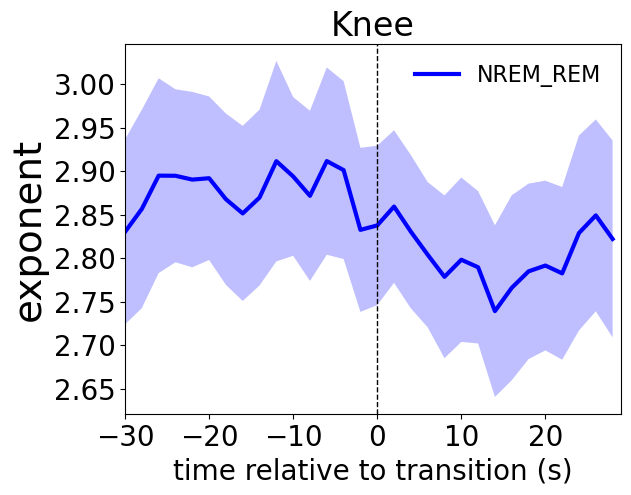

In [413]:
S_Km = np.nanmean(S_K,axis=0)
S_Ks = stats.sem(S_K,0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), S_Km[0:30],color='b',linestyle='-',linewidth=3, label = 'NREM_REM')
plt.fill_between(np.arange(-30,30,2),S_Km[0:30]-S_Ks[0:30], S_Km[0:30]+S_Ks[0:30],facecolor='b', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

In [391]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/KNEE'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

FileNotFoundError: [Errno 2] No such file or directory: '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/KNEE'

In [317]:
fm1 = FOOOFGroup()
S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    #K_K[i,0:len(fm1.get_params('aperiodic_params','knee'))] = fm1.get_params('aperiodic_params','knee')
    #O_K[i,0:len(fm1.n_peaks_)] = fm1.get_params('aperiodic_params','exponent')
    i = i +1
    
    

/tmp/ipykernel_471155/964933038.py:20: RuntimeWarning: Mean of empty slice
  S_K[i,0:40] = np.nanmean(Z,axis = 0)
/tmp/ipykernel_471155/964933038.py:21: RuntimeWarning: Mean of empty slice
  R_K[i,0:40] = np.nanmean(Z1,axis= 0)


In [318]:
S_Km = np.nanmean(S_K,axis=0)

S_Ks = stats.sem(S_K,0, nan_policy = 'omit')


Text(0.5, 0, 'time relative to transition (s)')

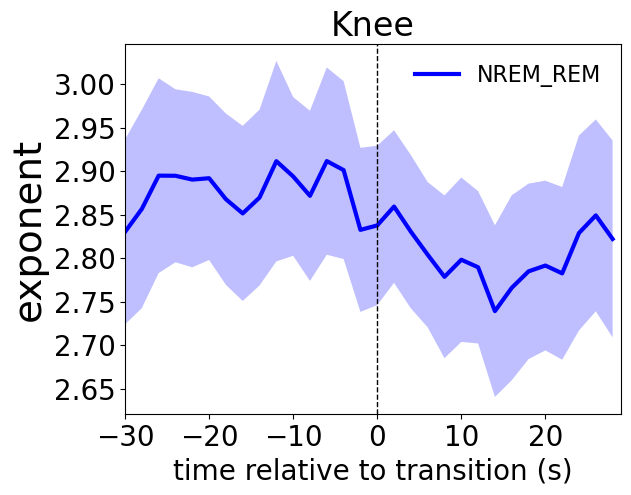

In [319]:
plt.plot(np.arange(-30,30,2), S_Km[0:30],color='b',linestyle='-',linewidth=3, label = 'NREM_REM')
plt.fill_between(np.arange(-30,30,2),S_Km[0:30]-S_Ks[0:30], S_Km[0:30]+S_Ks[0:30],facecolor='b', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

# GET THE KNEE VALUES THROUGH TRANSITIONS

In [425]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/N_R/KNEE'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

fm1 = FOOOFGroup()
S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    Y2 = fm1.get_params('aperiodic_params','knee')[0:X*40]
    Z2 = np.reshape(Y2, (int(len(Y2)/40) , 40))  
    
    Y3 = fm1.get_params('aperiodic_params','offset')[0:X*40]
    Z3 = np.reshape(Y3, (int(len(Y3)/40) , 40)) 
 
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    K_K[i,0:40] = np.nanmean(Z2,axis= 0)
    O_K[i,0:40] = np.nanmean(Z3,axis= 0)
    i = i +1
    
S_K_O = np.nanmean(S_K[::2],axis=0)
S_K_E = np.nanmean(S_K[1::2],axis=0)
S_K_Os = stats.sem(S_K[::2],0, nan_policy = 'omit')
S_K_Es = stats.sem(S_K[1::2],0, nan_policy = 'omit')

R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)
R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')   

O_K_O = np.nanmean(O_K[::2],axis=0)
O_K_E = np.nanmean(O_K[1::2],axis=0)
O_K_Os = stats.sem(O_K[::2],0, nan_policy = 'omit')
O_K_Es = stats.sem(O_K[1::2],0, nan_policy = 'omit')   

/tmp/ipykernel_471155/165736615.py:34: RuntimeWarning: Mean of empty slice
  S_K[i,0:40] = np.nanmean(Z,axis = 0)
/tmp/ipykernel_471155/165736615.py:35: RuntimeWarning: Mean of empty slice
  R_K[i,0:40] = np.nanmean(Z1,axis= 0)
/tmp/ipykernel_471155/165736615.py:36: RuntimeWarning: Mean of empty slice
  K_K[i,0:40] = np.nanmean(Z2,axis= 0)
/tmp/ipykernel_471155/165736615.py:37: RuntimeWarning: Mean of empty slice
  O_K[i,0:40] = np.nanmean(Z3,axis= 0)


Text(0.5, 0, 'time relative to transition (s)')

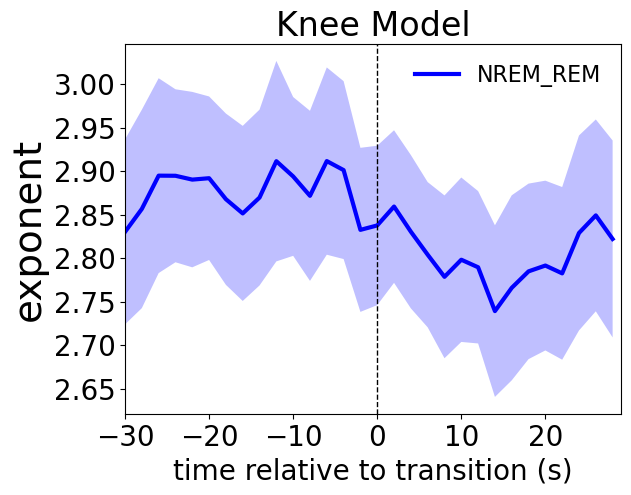

In [426]:
S_Km = np.nanmean(S_K,axis=0)

S_Ks = stats.sem(S_K,0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), S_Km[0:30],color='b',linestyle='-',linewidth=3, label = 'NREM_REM')
plt.fill_between(np.arange(-30,30,2),S_Km[0:30]-S_Ks[0:30], S_Km[0:30]+S_Ks[0:30],facecolor='b', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee Model', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

Text(0.5, 0, 'time relative to transition (s)')

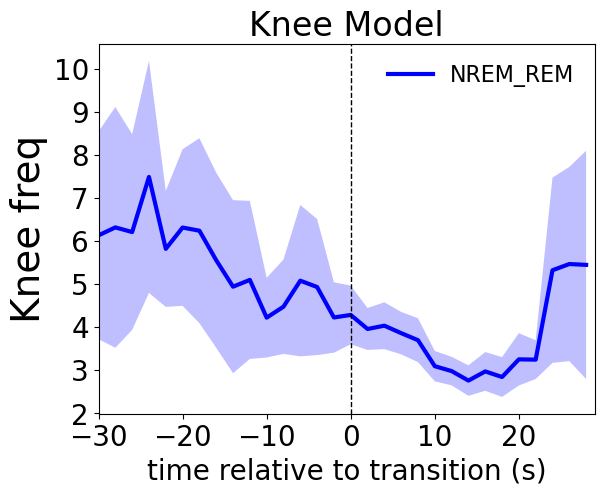

In [427]:
K_K2 = compute_knee_frequency(K_K, S_K)

K_K3 = np.ones([34,40])* np.nan
for i in range(0,K_K2.shape[0]):
    for ii in range(0,K_K2.shape[1]):
        knee = K_K2[i,ii]
        if knee < 1:
            K_K3[i,ii]= 1
        elif knee > 45:
            K_K3[i,ii]= 45
        else:
            K_K3[i,ii]=knee

K_K_O = np.nanmean(K_K3,axis=0)
K_K_Os = stats.sem(K_K3,0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), K_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'NREM_REM')
plt.fill_between(np.arange(-30,30,2),K_K_O[0:30]-K_K_Os[0:30], K_K_O[0:30]+K_K_Os[0:30],facecolor='b', alpha=0.25)


plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee Model', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Knee freq', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

In [430]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/E257/Transitions/REM/R_N/Knee'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

fm1 = FOOOFGroup()
S_K = np.ones([34,40]) * np.nan

R_K = np.ones([34,40]) * np.nan

K_K = np.ones([34,40]) * np.nan

O_K = np.ones([34,40]) * np.nan

i = 0
for S in subj_files:
    fm1.load(S, Data_path)
    
    X = floor(len(fm1.get_params('aperiodic_params','exponent'))/40)
    
    Y =  fm1.get_params('aperiodic_params','exponent')[0:X*40]
    Z = np.reshape(Y, (int(len(Y)/40) , 40))   
    
    Y1 =  fm1.get_params('r_squared')[0:X*40]
    Z1 = np.reshape(Y1, (int(len(Y1)/40) , 40))  
    
    Y2 = fm1.get_params('aperiodic_params','knee')[0:X*40]
    Z2 = np.reshape(Y2, (int(len(Y2)/40) , 40))  
    
    Y3 = fm1.get_params('aperiodic_params','offset')[0:X*40]
    Z3 = np.reshape(Y3, (int(len(Y3)/40) , 40)) 
 
    S_K[i,0:40] = np.nanmean(Z,axis = 0)
    R_K[i,0:40] = np.nanmean(Z1,axis= 0)
    K_K[i,0:40] = np.nanmean(Z2,axis= 0)
    O_K[i,0:40] = np.nanmean(Z3,axis= 0)
    i = i +1
    
S_K_O = np.nanmean(S_K[::2],axis=0)
S_K_E = np.nanmean(S_K[1::2],axis=0)
S_K_Os = stats.sem(S_K[::2],0, nan_policy = 'omit')
S_K_Es = stats.sem(S_K[1::2],0, nan_policy = 'omit')

R_K_O = np.nanmean(R_K[::2],axis=0)
R_K_E = np.nanmean(R_K[1::2],axis=0)
R_K_Os = stats.sem(R_K[::2],0, nan_policy = 'omit')
R_K_Es = stats.sem(R_K[1::2],0, nan_policy = 'omit')   

O_K_O = np.nanmean(O_K[::2],axis=0)
O_K_E = np.nanmean(O_K[1::2],axis=0)
O_K_Os = stats.sem(O_K[::2],0, nan_policy = 'omit')
O_K_Es = stats.sem(O_K[1::2],0, nan_policy = 'omit')   

/tmp/ipykernel_471155/621394576.py:34: RuntimeWarning: Mean of empty slice
  S_K[i,0:40] = np.nanmean(Z,axis = 0)
/tmp/ipykernel_471155/621394576.py:35: RuntimeWarning: Mean of empty slice
  R_K[i,0:40] = np.nanmean(Z1,axis= 0)
/tmp/ipykernel_471155/621394576.py:36: RuntimeWarning: Mean of empty slice
  K_K[i,0:40] = np.nanmean(Z2,axis= 0)
/tmp/ipykernel_471155/621394576.py:37: RuntimeWarning: Mean of empty slice
  O_K[i,0:40] = np.nanmean(Z3,axis= 0)


Text(0.5, 0, 'time relative to transition (s)')

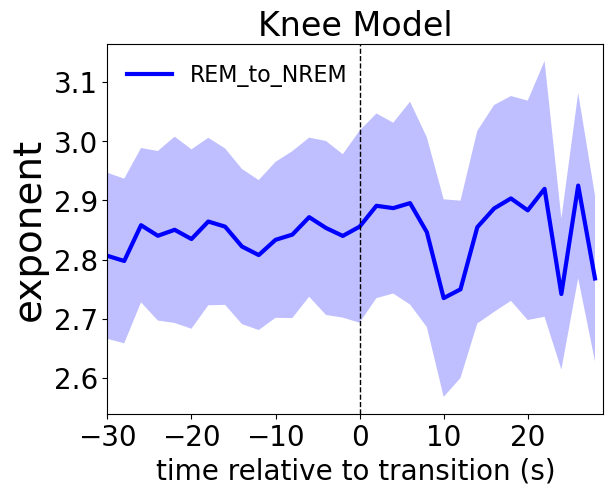

In [431]:
S_Km = np.nanmean(S_K,axis=0)

S_Ks = stats.sem(S_K,0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), S_Km[0:30],color='b',linestyle='-',linewidth=3, label = 'REM_to_NREM')
plt.fill_between(np.arange(-30,30,2),S_Km[0:30]-S_Ks[0:30], S_Km[0:30]+S_Ks[0:30],facecolor='b', alpha=0.25)

plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee Model', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)

Text(0.5, 0, 'time relative to transition (s)')

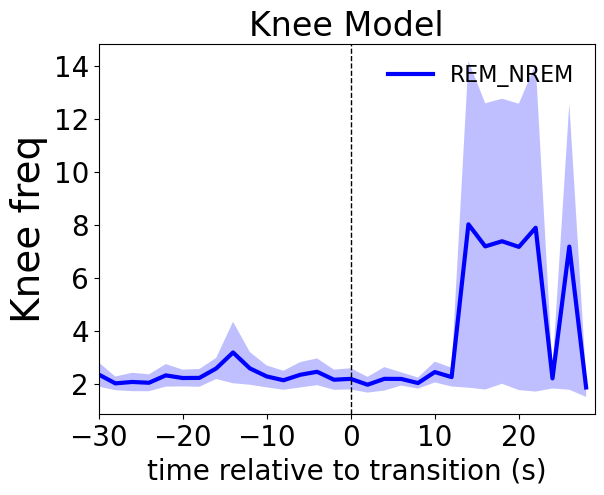

In [432]:
K_K2 = compute_knee_frequency(K_K, S_K)

K_K3 = np.ones([34,40])* np.nan
for i in range(0,K_K2.shape[0]):
    for ii in range(0,K_K2.shape[1]):
        knee = K_K2[i,ii]
        if knee < 1:
            K_K3[i,ii]= 1
        elif knee > 45:
            K_K3[i,ii]= 45
        else:
            K_K3[i,ii]=knee

K_K_O = np.nanmean(K_K3,axis=0)
K_K_Os = stats.sem(K_K3,0, nan_policy = 'omit')

plt.plot(np.arange(-30,30,2), K_K_O[0:30],color='b',linestyle='-',linewidth=3, label = 'REM_NREM')
plt.fill_between(np.arange(-30,30,2),K_K_O[0:30]-K_K_Os[0:30], K_K_O[0:30]+K_K_Os[0:30],facecolor='b', alpha=0.25)


plt.legend(prop={'size': 16}, frameon=False)
plt.title('Knee Model', fontsize = 24)
plt.xlim(-30, 29)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Knee freq', fontsize=28)
plt.xlabel('time relative to transition (s)', fontsize=20)